# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mini_keras as mk

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [2]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

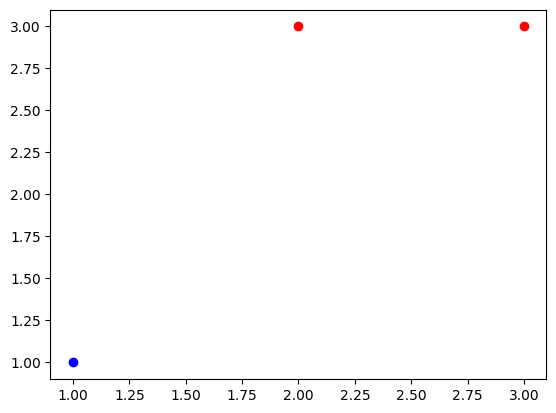

<Figure size 640x480 with 0 Axes>

In [3]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

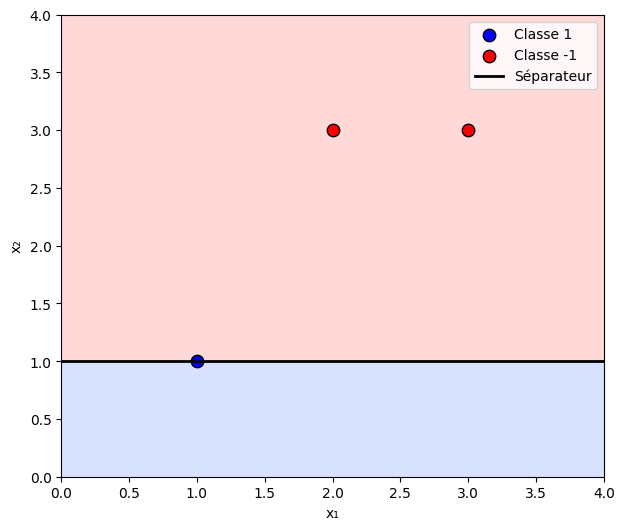

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [1, 1],
    [2, 3],
    [3, 3]
])
Y = np.array([1, -1, -1])

model = mk.LinearClassification()
model.fit(X.tolist(), Y.tolist())
w0, w1, w2 = model.get_weights()

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([model.predict(point.tolist()) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.5)

plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue', label='Classe 1', edgecolor='k', s=80)
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color='red', label='Classe -1', edgecolor='k', s=80)

x_plot = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
if w2 != 0:
    y_plot = -(w0 + w1 * x_plot) / w2
    plt.plot(x_plot, y_plot, 'k-', lw=2, label='Séparateur')
else:
    plt.axvline(-w0 / w1, color='k', linestyle='-', lw=2, label='Séparateur vertical')

plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.show()


### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [5]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

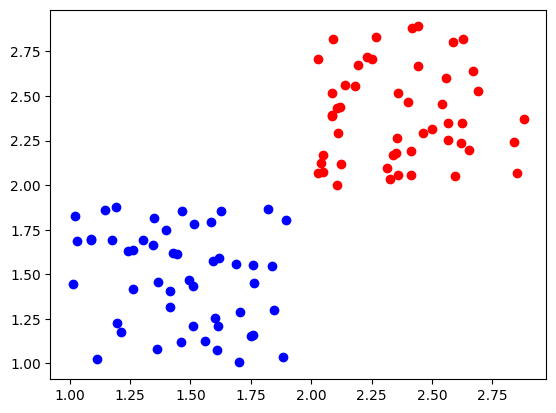

<Figure size 640x480 with 0 Axes>

In [6]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

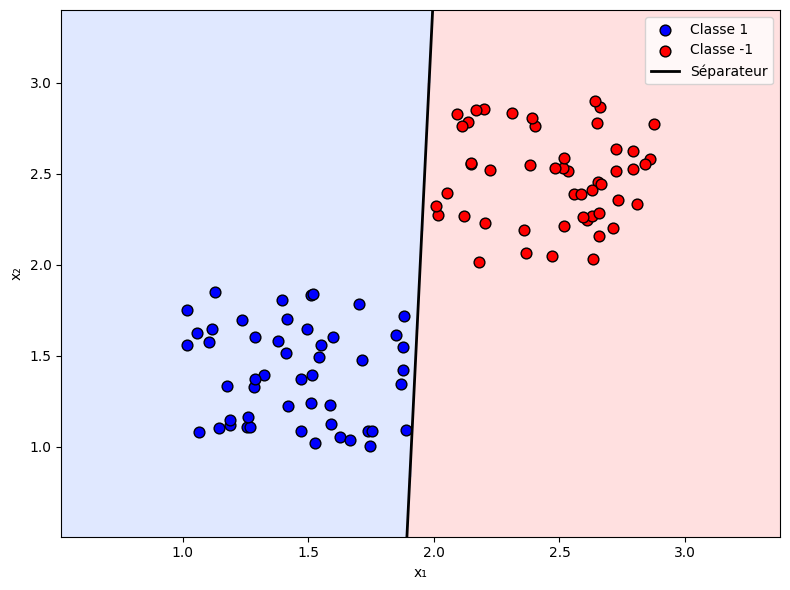

In [7]:
np.random.seed(0)
X = np.concatenate([
    np.random.random((50, 2)) * 0.9 + np.array([1, 1]),
    np.random.random((50, 2)) * 0.9 + np.array([2, 2])
])
Y = np.concatenate([
    np.ones((50, 1)),
    -np.ones((50, 1))
]).ravel()

model = mk.LinearClassification()
model.fit(X.tolist(), Y.tolist())
w0, w1, w2 = model.get_weights()

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([model.predict(point.tolist()) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.4)

plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', edgecolor='k', s=60, label='Classe 1')
plt.scatter(X[50:100, 0], X[50:100, 1], color='red', edgecolor='k', s=60, label='Classe -1')

x_plot = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
if w2 != 0:
    y_plot = -(w0 + w1 * x_plot) / w2
    plt.plot(x_plot, y_plot, 'k-', lw=2, label='Séparateur')
else:
    plt.axvline(-w0 / w1, color='k', linestyle='-', lw=2, label='Séparateur vertical')

plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
plt.tight_layout()
plt.show()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [8]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

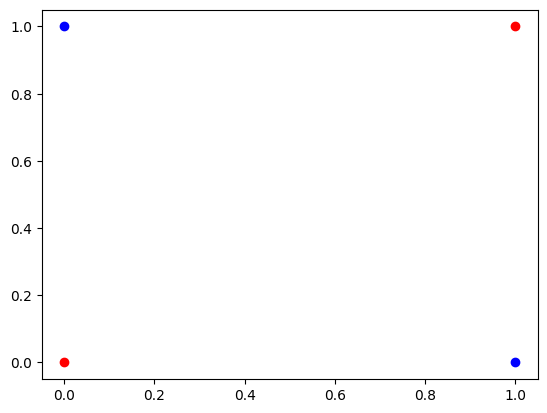

<Figure size 640x480 with 0 Axes>

In [9]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

Maximum number of iterations reached, convergence not reached.


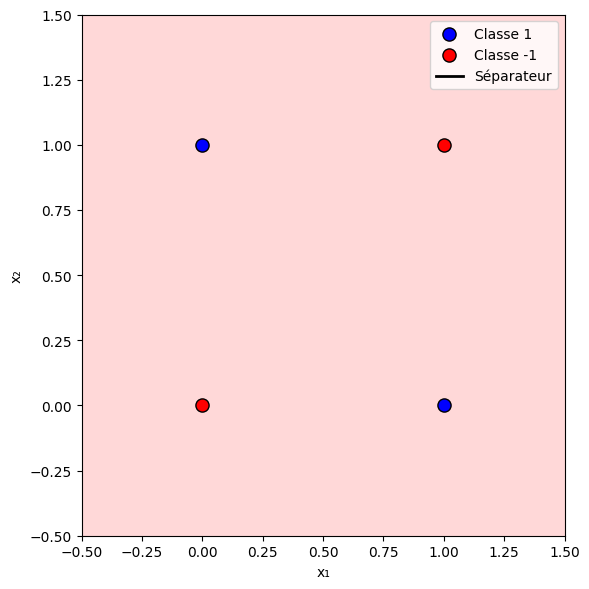

In [10]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

model = mk.LinearClassification(max_iterations=10000, verbose=True)
model.fit(X.tolist(), Y.tolist())
w0, w1, w2 = model.get_weights()

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 200),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 200)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([model.predict(point.tolist()) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.5)

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue', edgecolor='k', s=90, label='Classe 1')
plt.scatter(X[2:4, 0], X[2:4, 1], color='red', edgecolor='k', s=90, label='Classe -1')

x_plot = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
if w2 != 0:
    y_plot = -(w0 + w1 * x_plot) / w2
    plt.plot(x_plot, y_plot, 'k-', lw=2, label='Séparateur')
else:
    plt.axvline(-w0 / w1, color='k', linestyle='-', lw=2, label='Séparateur vertical')

plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
plt.tight_layout()
plt.show()


























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [11]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

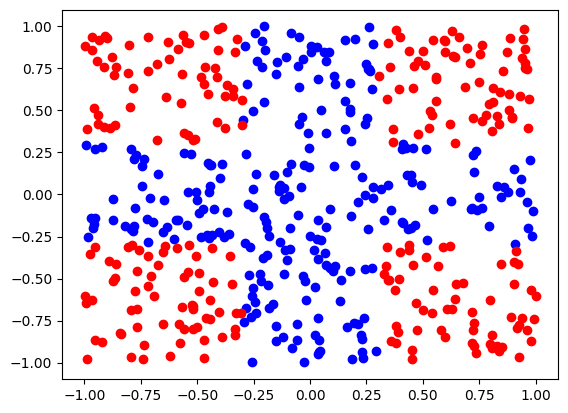

<Figure size 640x480 with 0 Axes>

In [12]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

Maximum number of iterations reached, convergence not reached.


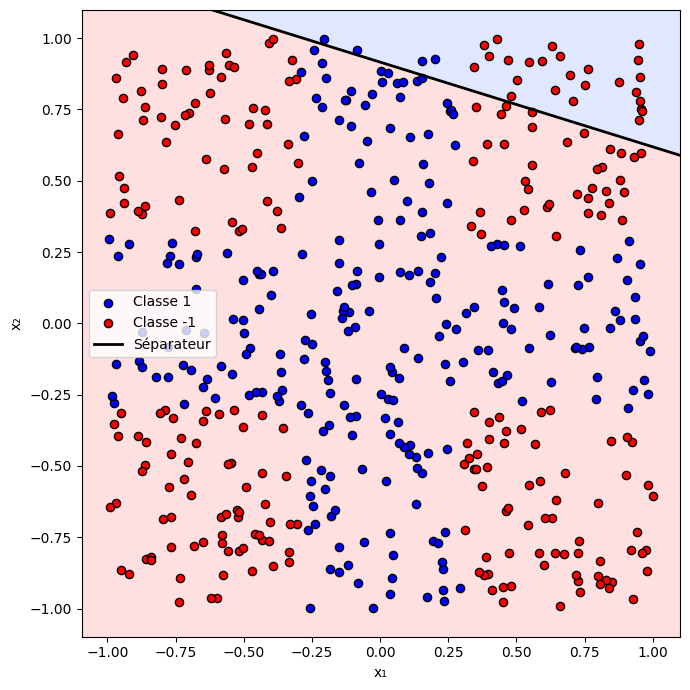

In [13]:
np.random.seed(0)
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

model = mk.LinearClassification(verbose=True, max_iterations=10000)
model.fit(X.tolist(), Y.tolist())
w0, w1, w2 = model.get_weights()

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 300),
    np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([model.predict(point.tolist()) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 7))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.4)

plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue', edgecolor='k', s=35, label='Classe 1')
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color='red', edgecolor='k', s=35, label='Classe -1')

x_plot = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
if w2 != 0:
    y_plot = -(w0 + w1 * x_plot) / w2
    plt.plot(x_plot, y_plot, 'k-', lw=2, label='Séparateur')
else:
    plt.axvline(-w0 / w1, color='k', linestyle='-', lw=2, label='Séparateur vertical')

plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.xlim(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
plt.ylim(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)
plt.tight_layout()
plt.show()


### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [14]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

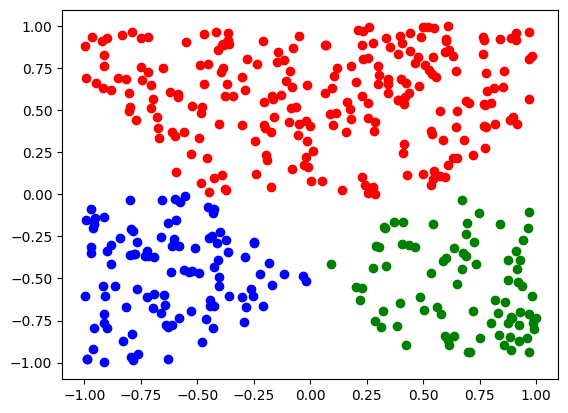

<Figure size 640x480 with 0 Axes>

In [15]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

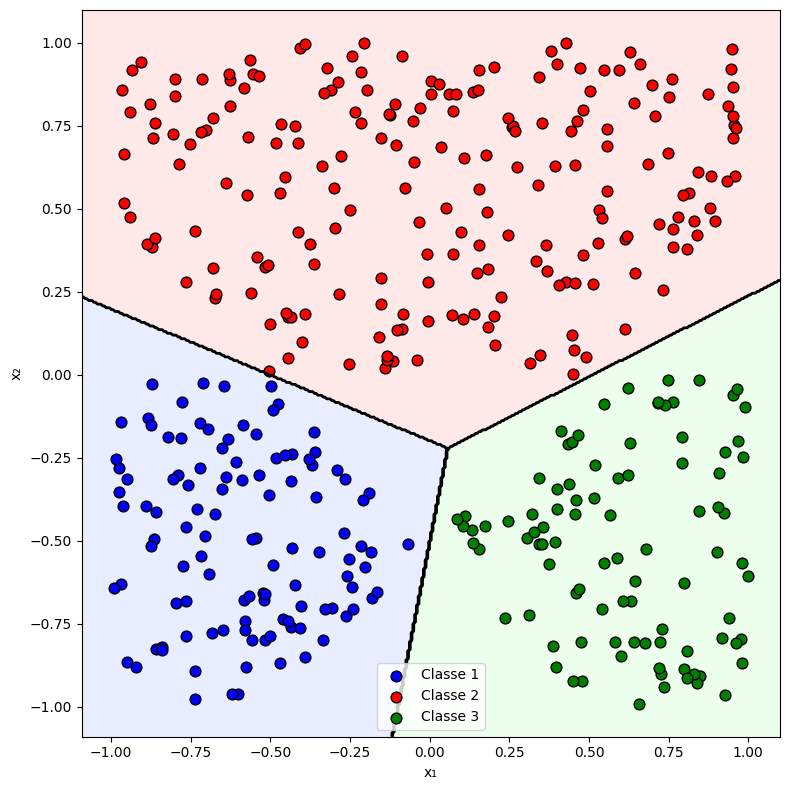

In [16]:
np.random.seed(0)
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([
    [1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
    [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
    [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
    [0, 0, 0] for p in X
])
mask = ~np.all(Y == [0, 0, 0], axis=1)
X = X[mask]
Y = Y[mask]

Y1 = np.where(Y[:,0]==1, 1, -1)
Y2 = np.where(Y[:,1]==1, 1, -1)
Y3 = np.where(Y[:,2]==1, 1, -1)

model1 = mk.LinearClassification()
model2 = mk.LinearClassification()
model3 = mk.LinearClassification()
model1.fit(X.tolist(), Y1.tolist())
model2.fit(X.tolist(), Y2.tolist())
model3.fit(X.tolist(), Y3.tolist())
w1 = model1.get_weights()
w2 = model2.get_weights()
w3 = model3.get_weights()

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1, 400),
    np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1, 400)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

Z1 = w1[0] + w1[1]*grid_points[:,0] + w1[2]*grid_points[:,1]
Z2 = w2[0] + w2[1]*grid_points[:,0] + w2[2]*grid_points[:,1]
Z3 = w3[0] + w3[1]*grid_points[:,0] + w3[2]*grid_points[:,1]

Z = np.stack([Z1, Z2, Z3], axis=1)
Z_pred = np.argmax(Z, axis=1)
Z_pred = Z_pred.reshape(xx.shape)

from matplotlib.colors import ListedColormap
zone_cmap = ListedColormap(['#b3c6ff', '#ffb3b3', '#c2ffc2'])

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z_pred, levels=[-0.5,0.5,1.5,2.5], cmap=zone_cmap, alpha=0.3)

plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], color='blue', edgecolor='k', s=60, label='Classe 1')
plt.scatter(X[Y[:,1]==1,0], X[Y[:,1]==1,1], color='red', edgecolor='k', s=60, label='Classe 2')
plt.scatter(X[Y[:,2]==1,0], X[Y[:,2]==1,1], color='green', edgecolor='k', s=60, label='Classe 3')

plt.contour(xx, yy, Z_pred, levels=[0.5, 1.5], colors='k', linewidths=2)

plt.xlabel('x₁')
plt.ylabel('x₂')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [17]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

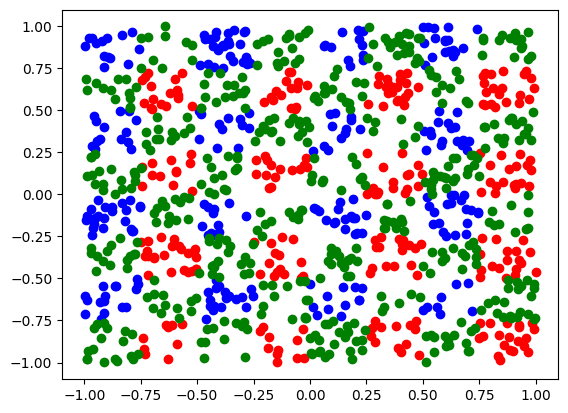

<Figure size 640x480 with 0 Axes>

In [18]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [19]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

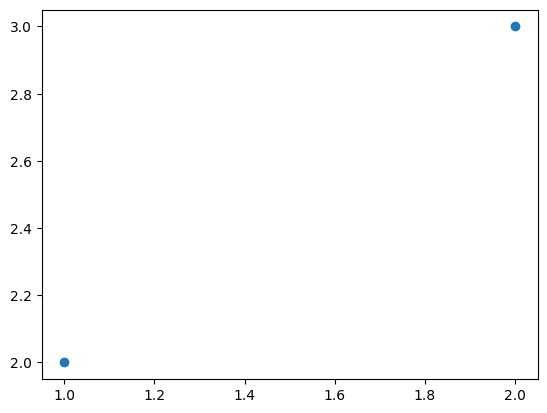

<Figure size 640x480 with 0 Axes>

In [20]:
plt.scatter(X,Y)
plt.show()
plt.clf()

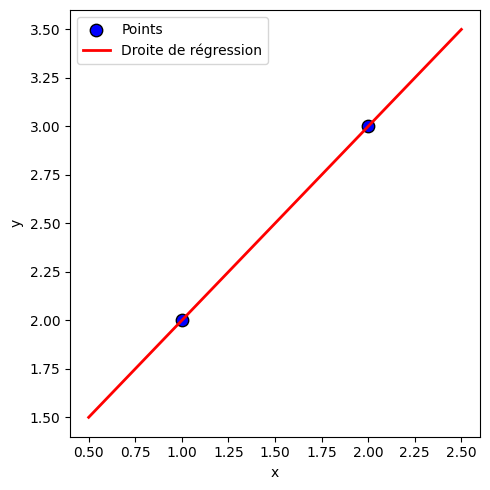

In [21]:
# Données simples
X = np.array([
      [1.0],
      [2.0]
])
Y = np.array([
      2.0,
      3.0
])

model = mk.LinearRegression()
model.fit(X, Y)

x_plot = np.linspace(X.min() - 0.5, X.max() + 0.5, 100).reshape(-1, 1)
y_plot = model.predict(x_plot)

plt.figure(figsize=(5, 5))
plt.scatter(X, Y, color='blue', edgecolor='k', s=80, label='Points')
plt.plot(x_plot, y_plot, 'r-', lw=2, label='Droite de régression')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [22]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

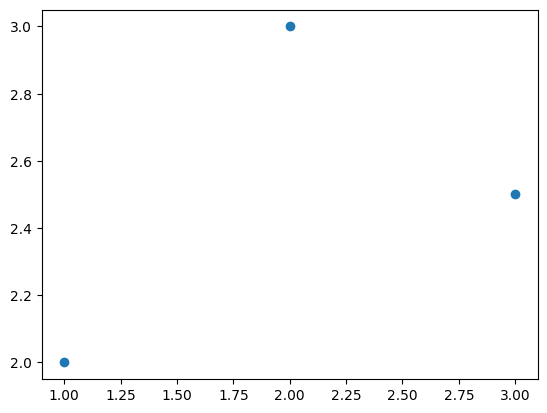

<Figure size 640x480 with 0 Axes>

In [23]:
plt.scatter(X,Y)
plt.show()
plt.clf()

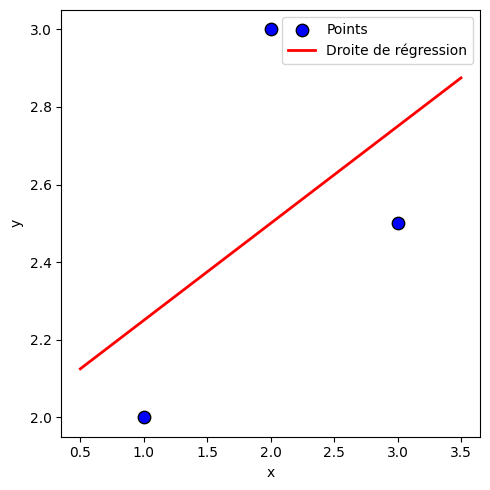

In [24]:
X = np.array([
      [1.0],
      [2.0],
      [3.0]
])
Y = np.array([
      2.0,
      3.0,
      2.5
])

model = mk.LinearRegression()
model.fit(X, Y)

x_plot = np.linspace(X.min() - 0.5, X.max() + 0.5, 100).reshape(-1, 1)
y_plot = model.predict(x_plot)

plt.figure(figsize=(5, 5))
plt.scatter(X, Y, color='blue', edgecolor='k', s=80, label='Points')
plt.plot(x_plot, y_plot, 'r-', lw=2, label='Droite de régression')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()


### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

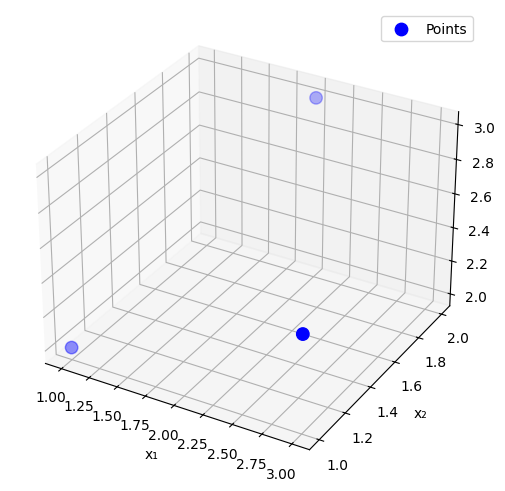

In [25]:
X = np.array([
    [1, 1],
    [2, 2],
    [3, 1]
])
Y = np.array([
    2,
    3,
    2.5
])

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, color='blue', s=80, label='Points')
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('y')
plt.tight_layout()
plt.legend()
plt.show()

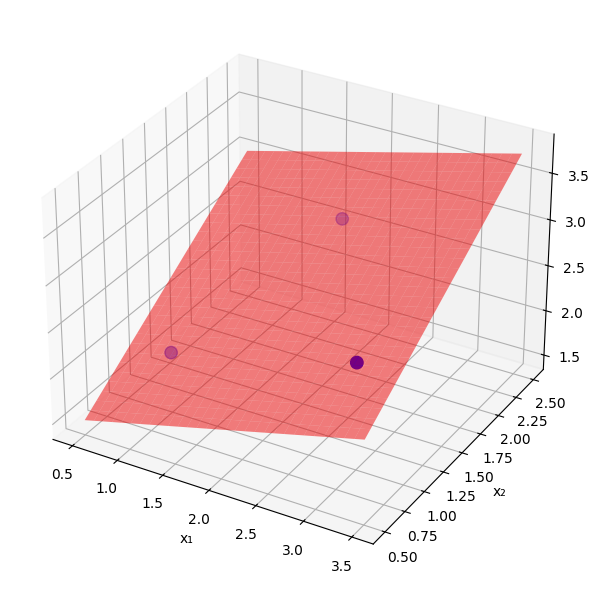

In [26]:
X = np.array([
    [1.0, 1.0],
    [2.0, 2.0],
    [3.0, 1.0]
])
Y = np.array([
    2.0,
    3.0,
    2.5
])

model = mk.LinearRegression()
model.fit(X, Y)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, color='blue', s=80, label='Points')

x1_grid = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
x2_grid = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
xx1, xx2 = np.meshgrid(x1_grid, x2_grid)
X_surface = np.c_[xx1.ravel(), xx2.ravel()]
y_surface = model.predict(X_surface).reshape(xx1.shape)

ax.plot_surface(xx1, xx2, y_surface, color='red', alpha=0.5)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()


### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

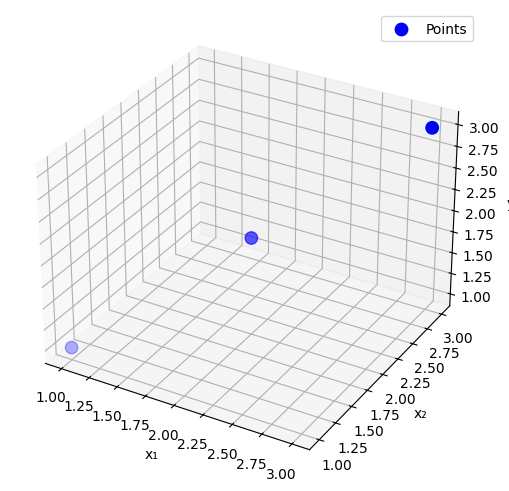

In [41]:
X = np.array([
      [1.0, 1.0],
      [2.0, 2.0],
      [3.0, 3.0]
])
Y = np.array([
      1.0,
      2.0,
      3.0
])

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='blue', s=80, label='Points')
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('y')
plt.legend()
plt.tight_layout()
plt.show()


In [42]:
X = np.array([
      [1.0, 1.0],
      [2.0, 2.0],
      [3.0, 3.0]
])
Y = np.array([
      1.0,
      2.0,
      3.0
])

model = mk.LinearRegression()
model.fit(X, Y)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, color='blue', s=80, label='Points')

x1_grid = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
x2_grid = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
xx1, xx2 = np.meshgrid(x1_grid, x2_grid)
X_surface = np.c_[xx1.ravel(), xx2.ravel()]
y_surface = model.predict(X_surface).reshape(xx1.shape)

ax.plot_surface(xx1, xx2, y_surface, color='red', alpha=0.5)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()



thread '<unnamed>' panicked at src/linear_model.rs:122:33:
XTX not inversible !: Lapack(LapackComputationalFailure { return_code: 3 })


PanicException: XTX not inversible !: Lapack(LapackComputationalFailure { return_code: 3 })

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

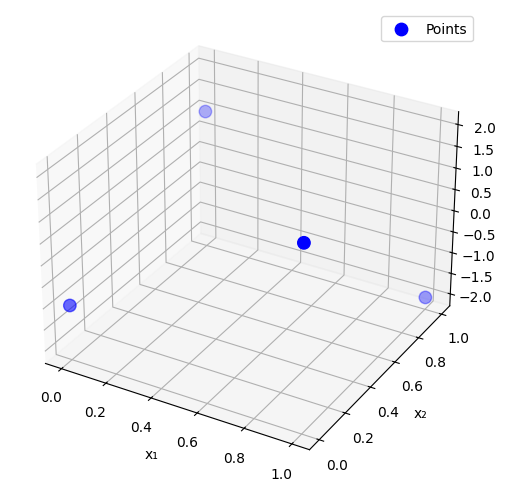

In [39]:
X = np.array([
      [1.0, 0.0],
      [0.0, 1.0],
      [1.0, 1.0],
      [0.0, 0.0],
])
Y = np.array([
      2.0,
      1.0,
      -2.0,
      -1.0
])

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='blue', s=80, label='Points')
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('y')
plt.legend()
plt.tight_layout()
plt.show()


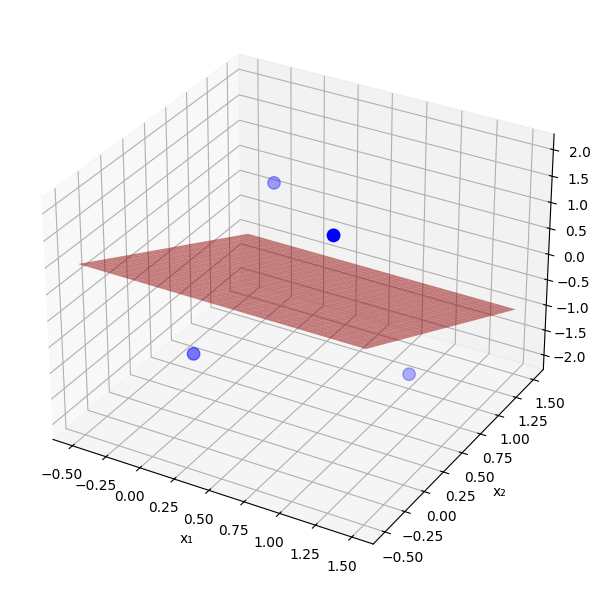

In [40]:
X = np.array([
      [1.0, 0.0],
      [0.0, 1.0],
      [1.0, 1.0],
      [0.0, 0.0],
])
Y = np.array([
      2.0,
      1.0,
      -2.0,
      -1.0
])

model = mk.LinearRegression()
model.fit(X, Y)
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, color='blue', s=80, label='Points')

x1_grid = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
x2_grid = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
xx1, xx2 = np.meshgrid(x1_grid, x2_grid)
X_surface = np.c_[xx1.ravel(), xx2.ravel()]
y_surface = model.predict(X_surface).reshape(xx1.shape)

ax.plot_surface(xx1, xx2, y_surface, color='red', alpha=0.5)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()
